In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [5]:
dataset = pd.read_csv(r"D:\Desktop\Codes\SleepDisorder\archive\Sleep_health_and_lifestyle_dataset.csv")
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data Cleaning 

In [6]:
dataset.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(0)

In [8]:
dataset_cleaned = dataset.drop_duplicates()

In [9]:
for col in dataset.columns:
    print(f"Unique values in column '{col}':")
    print(dataset[col].unique())
    print("-" * 20)

Unique values in column 'Person ID':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 2

In [10]:
outlier_columns = []

for column in dataset.select_dtypes(include=['number']).columns: 
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
    
    if not outliers.empty:
        outlier_columns.append(column)
        print(f"Column '{column}' has {len(outliers)} outliers.")

print("Columns with outliers:", outlier_columns)

Column 'Heart Rate' has 15 outliers.
Columns with outliers: ['Heart Rate']


# Feature engineering 

In [11]:
dataset.drop(columns=["Person ID"], inplace=True)

In [12]:
dataset["Sleep Disorder"] = dataset["Sleep Disorder"].fillna("No Disorder")
dataset.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# One Hot and Label Encoding 

In [13]:
df_numeric = dataset.copy()

le_gender = LabelEncoder()
df_numeric['Gender'] = le_gender.fit_transform(df_numeric['Gender'])

df_numeric = pd.get_dummies(df_numeric, columns=['Occupation'], dtype=int)

le_bmi = LabelEncoder()
df_numeric["BMI Category"] = le_bmi.fit_transform(df_numeric["BMI Category"])

df_numeric[['Systolic BP', 'Diastolic BP']] = df_numeric['Blood Pressure'].astype(str).str.split('/', expand=True).astype(int)

le_sleep = LabelEncoder()
df_numeric["Sleep Disorder"] = le_sleep.fit_transform(df_numeric["Sleep Disorder"])

df_numeric.drop(columns=["Blood Pressure"], inplace=True)

df_numeric.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Systolic BP,Diastolic BP
0,1,27,6.1,6,42,6,3,77,4200,1,...,0,0,0,0,0,0,1,0,126,83
1,1,28,6.2,6,60,8,0,75,10000,1,...,0,0,0,0,0,0,0,0,125,80
2,1,28,6.2,6,60,8,0,75,10000,1,...,0,0,0,0,0,0,0,0,125,80
3,1,28,5.9,4,30,8,2,85,3000,2,...,0,0,0,1,0,0,0,0,140,90
4,1,28,5.9,4,30,8,2,85,3000,2,...,0,0,0,1,0,0,0,0,140,90


# Visualization

Matplotlib is building the font cache; this may take a moment.
C:\Users\Admin\AppData\Local\Temp\ipykernel_788\1756742422.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=dataset, ax=axes[0, 0], palette=custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_788\1756742422.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Gender', data=dataset, ax=axes[0, 0], palette=custom_palette)
C:\Users\Admin\AppData\Local\Temp\ipykernel_788\1756742422.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep Disorder', data=dataset, ax=axes[1, 0], palette=custom_palette)


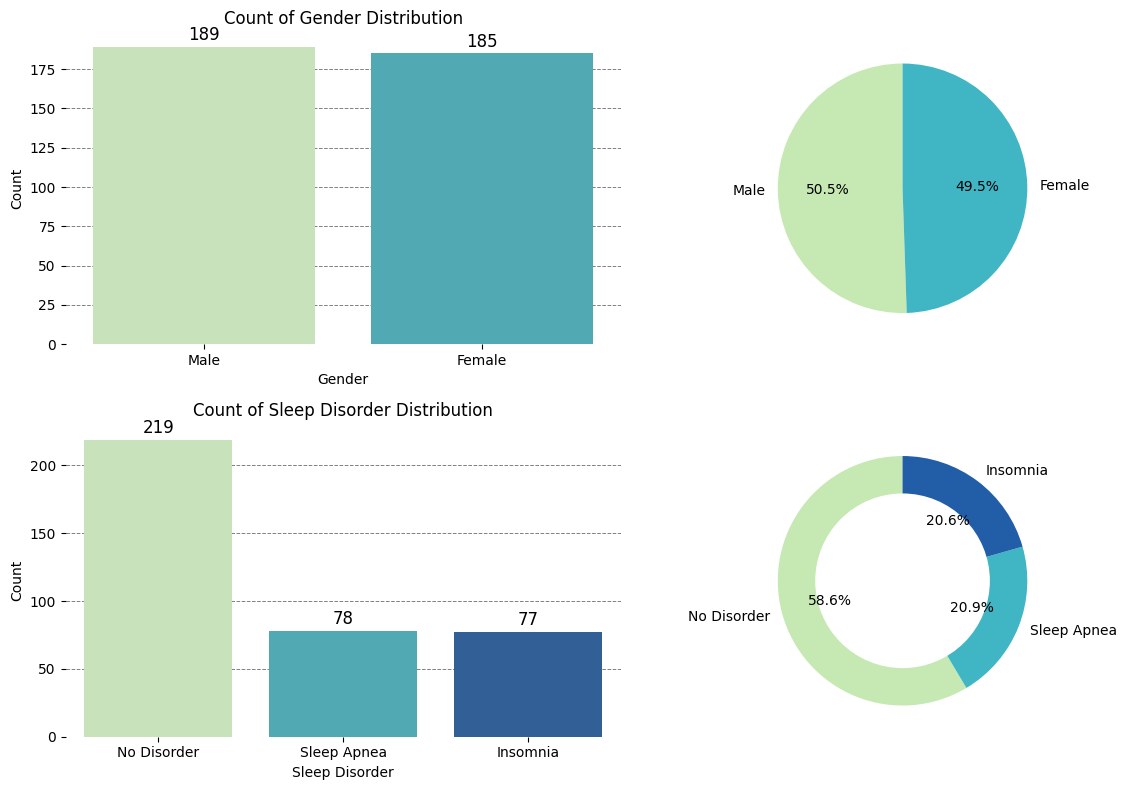

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  

sns.countplot(x='Gender', data=dataset, ax=axes[0, 0], palette=custom_palette)
axes[0, 0].set_title('Count of Gender Distribution')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')


for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

axes[0, 0].set_axisbelow(True)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

gender_counts = dataset['Gender'].value_counts()
wedges, texts, autotexts = axes[0, 1].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

sns.countplot(x='Sleep Disorder', data=dataset, ax=axes[1, 0], palette=custom_palette)
axes[1, 0].set_title('Count of Sleep Disorder Distribution')
axes[1, 0].set_xlabel('Sleep Disorder')
axes[1, 0].set_ylabel('Count')

for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

axes[1, 0].set_axisbelow(True)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

sleep_disorder_counts = dataset['Sleep Disorder'].value_counts()
wedges, texts, autotexts = axes[1, 1].pie(
    sleep_disorder_counts,
    labels=sleep_disorder_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=custom_palette
)

centre_circle2 = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle2)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_788\3847760951.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x='BMI Category', y='Count', hue='Gender', data=bmi_counts, palette=custom_palette, ax=ax)


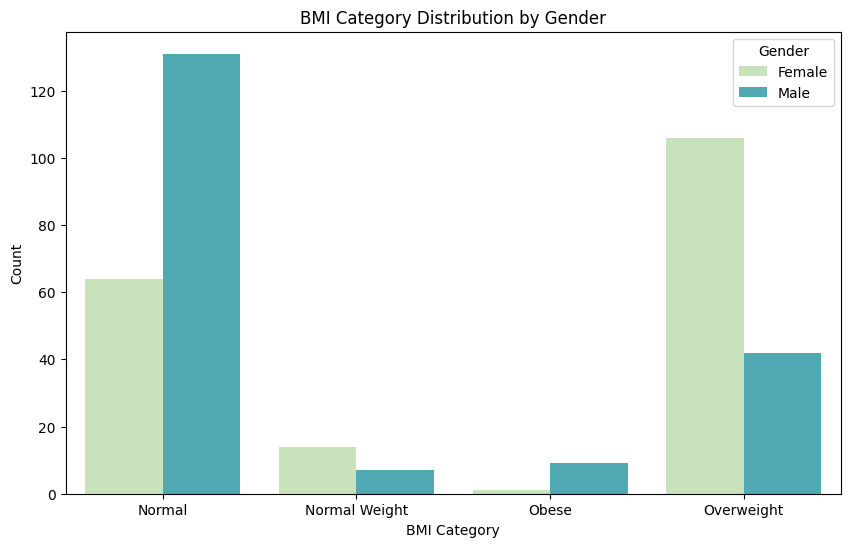

In [15]:
bmi_counts = dataset.groupby(['Gender', 'BMI Category']).size().reset_index(name='Count')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='BMI Category', y='Count', hue='Gender', data=bmi_counts, palette=custom_palette, ax=ax)
ax.set_title('BMI Category Distribution by Gender')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Count')
plt.show()

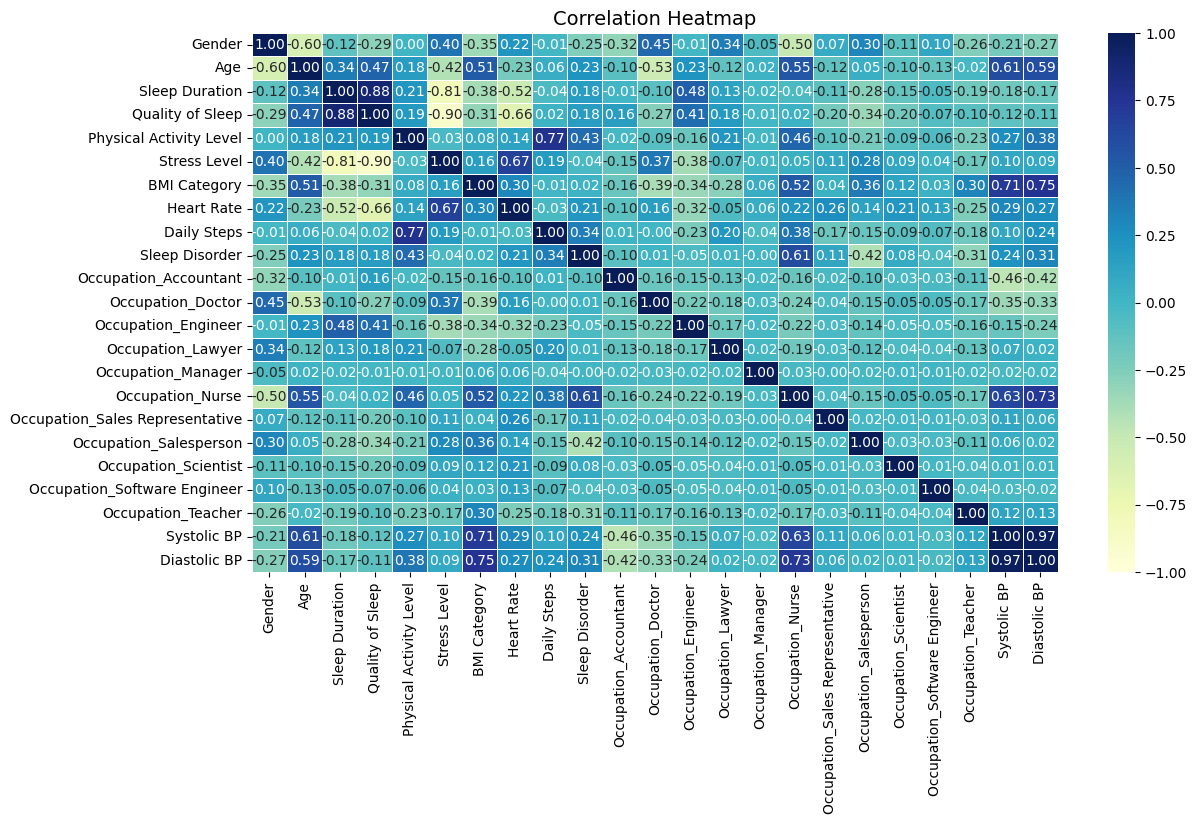

In [16]:
corr_matrix = df_numeric.corr()

plt.figure(figsize=(13, 7))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Correlation Heatmap", fontsize=14)

plt.show()


# Data Splitting and Model training 

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.95      0.98      0.97        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

The accuracy of the model is 0.88


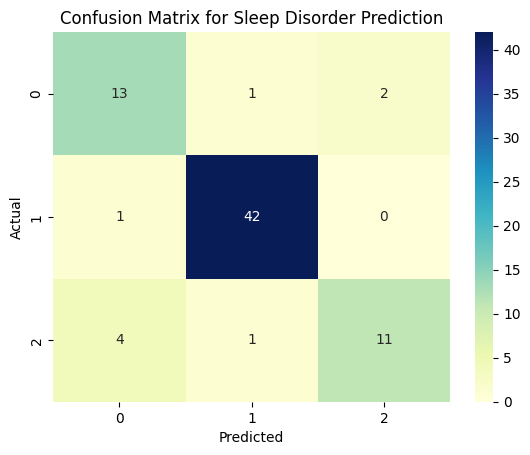

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = df_numeric.drop(['Sleep Disorder'], axis=1)
y = df_numeric['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_rf = accuracy_score(y_test, y_pred)

print(f'The accuracy of the model is {accuracy_rf}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap= "YlGnBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sleep Disorder Prediction')
plt.show()

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75

The accuracy of the model is 0.8933333333333333


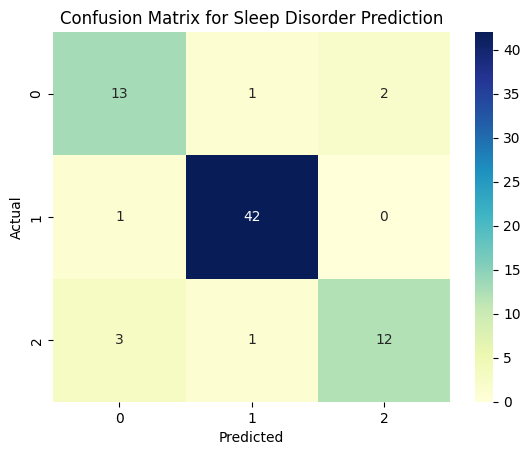

In [18]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

accuracy_dt = accuracy_score(y_test, y_pred2)

print(f'The accuracy of the model is {accuracy_dt}')

cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap= "YlGnBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sleep Disorder Prediction')
plt.show()

# SMOTE 

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.93      0.98      0.95        43
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.85      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

The accuracy score for the smote model is 0.88


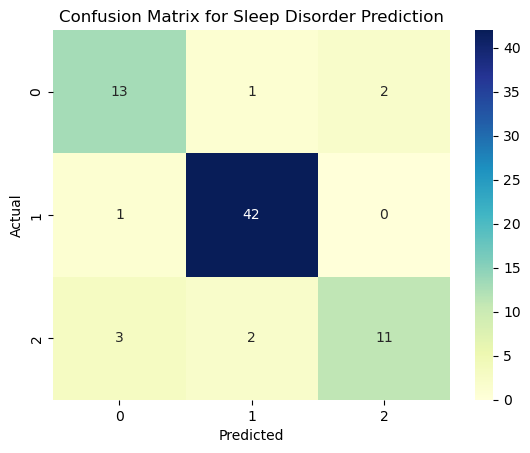

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier(random_state=42, class_weight='balanced')
model_smote.fit(X_train_smote, y_train_smote)

y_pred = model_smote.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy_smote = accuracy_score(y_test,y_pred)
print(f'The accuracy score for the smote model is {accuracy_smote}')

cm_smote = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap= "YlGnBu", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sleep Disorder Prediction')
plt.show()

# KNN


              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.91      0.95      0.93        43
           2       0.91      0.62      0.74        16

    accuracy                           0.87        75
   macro avg       0.85      0.82      0.82        75
weighted avg       0.87      0.87      0.86        75

The accuracy of the KNN model is 0.8666666666666667


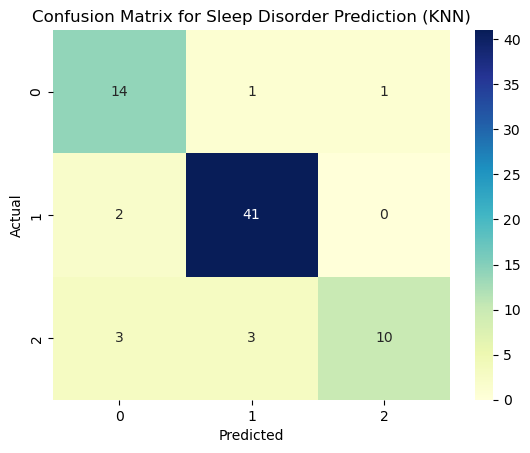

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_knn))

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'The accuracy of the KNN model is {accuracy_knn}')

# Plot confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="YlGnBu", 
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sleep Disorder Prediction (KNN)')
plt.show()


In [ ]:
%%writefile C:/Users/Admin/sleep.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

dataset = pd.read_csv(r"D:\Desktop\Codes\SleepDisorder\archive\Sleep_health_and_lifestyle_dataset.csv")
dataset.drop(columns=["Person ID"], inplace=True)
dataset["Sleep Disorder"] = dataset["Sleep Disorder"].fillna("No Disorder")

# Encoding categorical variables
le_gender = LabelEncoder()
dataset['Gender'] = le_gender.fit_transform(dataset['Gender'])

le_bmi = LabelEncoder()
dataset["BMI Category"] = le_bmi.fit_transform(dataset["BMI Category"])

le_sleep = LabelEncoder()
dataset["Sleep Disorder"] = le_sleep.fit_transform(dataset["Sleep Disorder"])

dataset[['Systolic BP', 'Diastolic BP']] = dataset['Blood Pressure'].astype(str).str.split('/', expand=True).astype(int)
dataset.drop(columns=["Blood Pressure"], inplace=True)

dataset = pd.get_dummies(dataset, columns=['Occupation'], dtype=int)

X = dataset.drop(['Sleep Disorder'], axis=1)
y = dataset['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

joblib.dump(model, "sleep_disorder_model.pkl")
joblib.dump(scaler, "scaler.pkl")

st.title("Sleep Disorder Prediction App")

gender = st.selectbox("Gender", le_gender.classes_)
age = st.number_input("Age", min_value=18, max_value=100, value=25)
occupation = st.selectbox("Occupation", dataset.columns[dataset.columns.str.startswith("Occupation_")].str.replace("Occupation_", ""))
sleep_duration = st.slider("Sleep Duration (hours)", 3.0, 12.0, 7.0)
quality_of_sleep = st.slider("Quality of Sleep (1-10)", 1, 10, 5)
physical_activity = st.slider("Physical Activity Level (1-50)", 1, 50, 25)
stress_level = st.slider("Stress Level (1-10)", 1, 10, 5)
bmi_category = st.selectbox("BMI Category", le_bmi.classes_)
blood_pressure = st.text_input("Blood Pressure (Systolic/Diastolic)", "120/80")
heart_rate = st.number_input("Heart Rate", min_value=40, max_value=150, value=72)
daily_steps = st.number_input("Daily Steps", min_value=1000, max_value=30000, value=5000)

if st.button("Predict Sleep Disorder"):
    systolic_bp, diastolic_bp = map(int, blood_pressure.split("/"))
    
    user_data = {
        "Gender": le_gender.transform([gender])[0],
        "Age": age,
        "Sleep Duration": sleep_duration,
        "Quality of Sleep": quality_of_sleep,
        "Physical Activity Level": physical_activity,
        "Stress Level": stress_level,
        "BMI Category": le_bmi.transform([bmi_category])[0],
        "Systolic BP": systolic_bp,
        "Diastolic BP": diastolic_bp,
        "Heart Rate": heart_rate,
        "Daily Steps": daily_steps,
    }
    
    for col in dataset.columns[dataset.columns.str.startswith("Occupation_")]:
        user_data[col] = 1 if occupation in col else 0
    for col in X.columns:
        if col not in user_data:
            user_data[col] = 0  

    df_input = pd.DataFrame([user_data])[X.columns] 
    df_scaled = scaler.transform(df_input)
    prediction = model.predict(df_scaled)[0]
    
    sleep_disorder_mapping = {0: "Insomnia", 1: "No Disorder", 2: "Sleep Apnea"}
    st.success(f"Predicted Sleep Disorder: {sleep_disorder_mapping[prediction]}")


Overwriting C:/Users/madir/OneDrive/Desktop/sleep.py
